In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from tqdm import tqdm

from pymongo import MongoClient
from pymongo.cursor import CursorType

import warnings
warnings.filterwarnings('ignore')

In [2]:
from hanspell import spell_checker
from pykospacing import spacing
from soynlp.normalizer import *
from konlpy.tag import Okt

okt = Okt()

In [3]:
# 불용어 리스트

stopwords = []
f = open('data/stopwords.csv')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()

In [4]:
# 정규표현식 한글 제외하고 제거
def delete_re_dm(dataframe,column):
    dataframe[column] = dataframe[column].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', " ")
    dataframe1 = dataframe.drop_duplicates(subset=[column], inplace=False)
    dataframe1[column].replace('', np.nan, inplace=True)
    dataframe2 = dataframe1.dropna(how='any')
    dataframe2.reset_index(inplace=True)
    dataframe2.drop(columns = 'index', inplace=True)
    return dataframe2

# 중복 제거
def delete_dp_dm(dataframe,column):
    dataframe1 = dataframe.copy()
    dataframe1[column] = dataframe1[column].apply(lambda x : x.strip())
    dataframe1[dataframe1[column]==''] = np.nan
    dataframe2 = dataframe1.dropna(how='any')
    dataframe2.reset_index(inplace=True)
    dataframe2.drop(columns = 'index', inplace=True)
    return dataframe2

#  텍스트 전처리 함수
def text_preprocessing(textlist):
    X_train = []
    i=0
    for sentence in tqdm(textlist):
        try:
            temp_X = []
            new_sentence = spacing(sentence)
            new_sentence = spell_checker.check(new_sentence).checked
            new_sentence = emoticon_normalize(new_sentence, num_repeats=2)
            temp_X = okt.morphs(new_sentence, norm=True, stem=True)
            temp_X = [w for w in temp_X if not w in stopwords]
#             temp_X = [w for w in temp_X if len(w)>=2]
            X_train.append(temp_X)
        except Exception as e:
            temp_X = ['에러']
            X_train.append(temp_X)
            print(i,'번째에서 error 발생', e)
        i+=1
    return X_train

# 문장 전처리 함수
def sentence_preprocessing(sentence):
    new_sentence = spacing(sentence)
    new_sentence = spell_checker.check(new_sentence).checked
    new_sentence = emoticon_normalize(new_sentence, num_repeats=2)
    new_sentence = okt.morphs(new_sentence, norm=True, stem=True)
    new_sentence = [w for w in new_sentence if not w in stopwords]
    return new_sentence

In [5]:
# 몽고db 쿼리 함수

def find_item_one(mongo, condition=None, db_name=None, collection_name=None):
    result = mongo[db_name][collection_name].find_one(condition, {"_id": False})
    return result

def find_item(mongo, condition=None, db_name=None, collection_name=None):
    result = mongo[db_name][collection_name].find(condition, {"_id": False}, no_cursor_timeout=True)
    return result

In [6]:
host = '121.138.83.13'
port = '1234'
mongo = MongoClient(host, int(port))
print(mongo)

MongoClient(host=['121.138.83.13:1234'], document_class=dict, tz_aware=False, connect=True)


In [7]:
cursor_happy = find_item(mongo, None,'Twitter','happy')
cursor_angry = find_item(mongo, None,'Twitter','angry')
cursor_sad = find_item(mongo, None,'Twitter','sad')

In [8]:
text_happy = []
text_angry = []
text_sad = []
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
for i in tqdm(cursor_happy):
    text_happy.append(i['text'])

for i in tqdm(cursor_angry):
    text_angry.append(i['text'])
    
for i in tqdm(cursor_sad):
    text_sad.append(i['text'])    

104330it [00:02, 41430.98it/s]
34342it [00:00, 34428.06it/s]
21745it [00:00, 30841.61it/s]


In [9]:
text_happy

['RT @ithurn: 기사님과 한동네 살아서\n퇴근 직전에야 들르시능데.... \n딱 쩨맘 😭😭',
 '모두의 익명 질문을 모집 중!\n\n최근 답변한 질문\n● 와우님이랑 리도이 캐해 찰떡…\n● 와우님~~~~!!\n언제나 썰…\n● 와우님 사랑해😎…\n● 나는 행복해\n와우님과 트친이…\n#질문상자 #익명질문모집중\n\nhttps://t.co/7LADaChpy2',
 'RT @mocci_peach226: 얼굴만봐도 신나😗 니들 존재가 행복 겸댕이들아🙃🤍💖💙💜 https://t.co/XG0NdI9Jvy',
 '@whyimqueen 기쁨',
 '@Annettechic83 웅웅 보고있으면 행복해 ㅋㅋ',
 'RT @RV_storage0801: 린배배 웃음이 우리의 행복 버튼🔘 https://t.co/zDN5ojHoBK',
 '으아ㅏㅏㄱ 행복 중💜 https://t.co/TL9sRqD7N5',
 '기쁘다 캉님 오셨다',
 'RT @RV_storage0801: 린배배 웃음이 우리의 행복 버튼🔘 https://t.co/zDN5ojHoBK',
 '행복해\n행복해\n설명:메이플에서 채팅으로 자살이라는 단어를 치면 행복으로 필터링된다',
 'RT @TXT_members: 여러분!!! 쇼챔피언 1위를 했어요!!! 뿌이뿌이뿌이~~\n진짜 팬분들 아니었으면 절대 하지 못했을 거에요ㅠㅠ\n항상 감사하고 항상 말하지만 팬분들이 저의 원동력이에요ㅎㅎ❤️\n흐아 행복해 죽겠당ㅎㅎ\n감사합니당❤️\n#연준 #…',
 '이거 다시봐도 귀엽다 손 위치 딱맞는거 첨이라서 기쁨 맨날 누구 이마빡때리고 허공때리고 님이키가작아서다행인줄아십시오쒸익쒸익 이랫는데',
 'RT @ourpersisrel: 다이어트 하거나 식단 관리 하시는 분들 꼬옥 두부 유부초밥을 해 드시면 돼 ... 마트에서 파는 2인 유부초밥 키트랑 단단한 두부 한 모만 준비하면 양 딱 맞아요! 묵은지 물에 씻어서 잘게 잘라 넣으면 더 맛있구요 다…',
 'RT @avecalice: “긍정심리학과 더 광범위하게 퍼진 행복 산업처럼

In [10]:
df_happy1 = pd.DataFrame({'text':text_happy[:20000]})
df_angry1 = pd.DataFrame({'text':text_angry[:20000]})
df_sad1 = pd.DataFrame({'text':text_sad[:14000]})

In [11]:
df_happy = delete_re_dm(df_happy1,'text')
df_happy = delete_dp_dm(df_happy,'text')

df_angry = delete_re_dm(df_angry1,'text')
df_angry = delete_dp_dm(df_angry,'text')

df_sad = delete_re_dm(df_sad1,'text')
df_sad = delete_dp_dm(df_sad,'text')

In [12]:
df_angry

,text
0,짜증나게 사진 설정 해야 되잖아 니 새끼 존나 짜증나
1,존나 화나
2,아니 버스 왜안와 화나
3,귀여워젠장ㅋㅋ ㅋㅋㅋㅋㅋㅋㅋㅋ 나도 너보면 짱나 이러면서 새우튀김 하나 더 시켜줄래...
4,짜증나 죽어야지
...,...
10056,시 발 진짜 암만 생각해도 빡치고 곱씹을수록 빡침 짜증나 진짜 ㅌ덕하...
10057,짜증나 말하는거 잼민동ㅅ같아
10058,마자 짱나 사람 희망고문 시켜 퉷퉤
10059,뱅 몇 달전부터 슬슬 노잼이긴 했는데 이젠 정말 한 곡 치기도 귀찮다 시작 전 타이...


In [13]:
df_sad

,text
0,카리이이ㅠㅠㅠㅠㅠㅠㅠ 슬퍼 ㅠ ㅠ 치킨 치킨 좋다 치킨 먹어야겠다 ㅠㅠ 카린두...
1,아 진심 너무 슬프다 이런 거 좋은데 읽으면 마음이 너무 아픔
2,애기 슬프다 슬퍼
3,아 진짜ㅋㄱㅋ 마스크끼고 가는 사람은 간데서 한번만 다녀오까싶었는데 자주가던 코노 ...
4,진격의거인 트친소 밈들 명이 밧스면서 맘찍 아무도 안해주내 나 ...
...,...
7340,큰옵바 물품이 없어서 벗김 갑자기 사이즈증식을할줄은 몰랐던 어리석은 과거애...
7341,휴가시작 속초시 요리왕 사랑해요 영월군 동남구 오늘은 애인스타그램 상록구 수영구 슬...
7342,나 친구 없어서 슬프다
7343,어떡해 너무 슬퍼


In [14]:
df_happy = df_happy.drop(df_happy.index[[1,8,17,26,31,36,39,59,84,98,107,144,165,196,207,272,279,281]])

In [16]:
df_happy = df_happy[df_happy['text'].str.contains('아스트로')==False]
df_happy = df_happy[df_happy['text'].str.contains('은우')==False]
df_happy = df_happy[df_happy['text'].str.contains('트레저')==False]
df_happy = df_happy[df_happy['text'].str.contains('건희')==False]
df_happy = df_happy[df_happy['text'].str.contains('섹트')==False]
df_happy = df_happy[df_happy['text'].str.contains('도운')==False]

In [17]:
df_happy

,text
0,기사님과 한동네 살아서 퇴근 직전에야 들르시능데 딱 쩨맘
2,얼굴만봐도 신나 니들 존재가 행복 겸댕이들아
3,기쁨
4,웅웅 보고있으면 행복해 ㅋㅋ
5,린배배 웃음이 우리의 행복 버튼
...,...
9922,ㅋㄹㅋㄹㅋㄹㅋㄹㅋㅅㅋㅅㅋ 미친 유퀴즈는 왜 실트냐 ㅋㄹㅋㅋㅎㅋㄹㅎㅋㅋ 기뻐 날뛰는 ...
9923,내 최애는 너무 착해서 밀당할 줄 모르는 거 같다 예전엔 이성한테 인기도 많을 거라...
9924,ㅋ큐ㅜㅜㅠㅜ 어쩜 좋아 개 아팠나봐
9925,그런데 우리 사일이만 왜 창문 뜯고 나오는 것 같죠 선명해서 좋긴 좋다 다른 사일이...


In [18]:
df_happy['category'] = 0
df_angry['category'] = 1
df_sad['category'] = 2

In [19]:
df_sad

,text,category
0,카리이이ㅠㅠㅠㅠㅠㅠㅠ 슬퍼 ㅠ ㅠ 치킨 치킨 좋다 치킨 먹어야겠다 ㅠㅠ 카린두...,2
1,아 진심 너무 슬프다 이런 거 좋은데 읽으면 마음이 너무 아픔,2
2,애기 슬프다 슬퍼,2
3,아 진짜ㅋㄱㅋ 마스크끼고 가는 사람은 간데서 한번만 다녀오까싶었는데 자주가던 코노 ...,2
4,진격의거인 트친소 밈들 명이 밧스면서 맘찍 아무도 안해주내 나 ...,2
...,...,...
7340,큰옵바 물품이 없어서 벗김 갑자기 사이즈증식을할줄은 몰랐던 어리석은 과거애...,2
7341,휴가시작 속초시 요리왕 사랑해요 영월군 동남구 오늘은 애인스타그램 상록구 수영구 슬...,2
7342,나 친구 없어서 슬프다,2
7343,어떡해 너무 슬퍼,2


In [20]:
df = pd.concat([df_happy,df_angry,df_sad])

In [21]:
df

,text,category
0,기사님과 한동네 살아서 퇴근 직전에야 들르시능데 딱 쩨맘,0
2,얼굴만봐도 신나 니들 존재가 행복 겸댕이들아,0
3,기쁨,0
4,웅웅 보고있으면 행복해 ㅋㅋ,0
5,린배배 웃음이 우리의 행복 버튼,0
...,...,...
7340,큰옵바 물품이 없어서 벗김 갑자기 사이즈증식을할줄은 몰랐던 어리석은 과거애...,2
7341,휴가시작 속초시 요리왕 사랑해요 영월군 동남구 오늘은 애인스타그램 상록구 수영구 슬...,2
7342,나 친구 없어서 슬프다,2
7343,어떡해 너무 슬퍼,2


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, stratify = df['category'], test_size=0.2, random_state = 42)

In [24]:
train['category'].value_counts(normalize = True)

1    0.369989
0    0.359875
2    0.270136
Name: category, dtype: float64

In [25]:
test['category'].value_counts(normalize = True)

1    0.370105
0    0.359809
2    0.270086
Name: category, dtype: float64

In [26]:
y_train = train['category'].tolist()
y_test = test['category'].tolist()

In [27]:
X_train = text_preprocessing(train['text'])

In [28]:
X_test = text_preprocessing(test['text'])

In [29]:
# import pickle 

# with open('data/X_train.pickle','rb') as fw:
#     X_train = pickle.load(fw)

# with open('data/X_test.pickle','rb') as fw:
#     X_test = pickle.load(fw)

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
print(tokenizer.word_index)

{'하다': 1, '이': 2, '좋다': 3, '에': 4, '가': 5, '너무': 6, '도': 7, '짜증': 8, '진짜': 9, '는': 10, '은': 11, '들': 12, '슬프다': 13, '의': 14, '싫다': 15, '없다': 16, '같다': 17, '아니다': 18, '를': 19, '되다': 20, '그렇다': 21, '사람': 22, '으로': 23, '못': 24, '가다': 25, '그냥': 26, '더': 27, '오다': 28, '받다': 29, '왜': 30, '않다': 31, '들다': 32, '화나다': 33, '후회': 34, '생각': 35, '먹다': 36, '자다': 37, '한': 38, '좀': 39, '슬픔': 40, '일': 41, '행복하다': 42, '괜찮다': 43, '보고': 44, '이렇다': 45, '개': 46, '좋아하다': 47, '오늘': 48, '사랑': 49, '정말': 50, '알다': 51, '우리': 52, '모르다': 53, '하나': 54, '돼다': 55, '과': 56, '맞다': 57, '죽다': 58, '버리다': 59, '귀엽다': 60, '외롭다': 61, '미치다': 62, '자기': 63, '분노': 64, '행복': 65, '많이': 66, '집': 67, '쓰다': 68, '기분': 69, '마음': 70, '크다': 71, '시간': 72, '불만': 73, '친구': 74, '노래': 75, '만들다': 76, '보이다': 77, '와': 78, '내다': 79, '다른': 80, '얼굴': 81, '소리': 82, '자': 83, '느낌': 84, '살': 85, '사실': 86, '제일': 87, '다시': 88, '우울하다': 89, '머리': 90, '그래도': 91, '재밌다': 92, '돈': 93, '계속': 94, '살다': 95, '성질': 96, '웃다': 97, '예쁘다': 98, '밉다': 99, '없이': 100, '서다': 1

In [33]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18842
등장 빈도가 2번 이하인 희귀 단어의 수: 11498
단어 집합에서 희귀 단어의 비율: 61.02324593992145
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.473074608904934


In [34]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7346


In [35]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
print(X_train[:3])

[[871, 990, 1820, 1, 671, 1, 8, 25, 170, 4], [10, 7, 43, 78, 199], [6, 16, 167, 1626]]


In [37]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [38]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

21654
21654


text의 최대 길이 : 44
text의 평균 길이 : 12.28041008589637


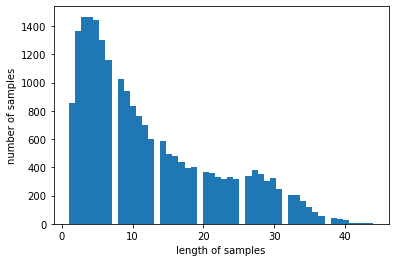

In [39]:
print('text의 최대 길이 :',max(len(l) for l in X_train))
print('text의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [41]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.41211785351436


In [42]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=100, validation_split=0.2)

Epoch 1/15
174/174 [==============================] - 11s 44ms/step - loss: 0.7609 - acc: 0.6574 - val_loss: 0.2012 - val_acc: 0.9335

Epoch 00001: val_acc improved from -inf to 0.93350, saving model to best_model.h5
Epoch 2/15
174/174 [==============================] - 7s 42ms/step - loss: 0.1343 - acc: 0.9572 - val_loss: 0.1849 - val_acc: 0.9363

Epoch 00002: val_acc improved from 0.93350 to 0.93627, saving model to best_model.h5
Epoch 3/15
174/174 [==============================] - 7s 41ms/step - loss: 0.0834 - acc: 0.9762 - val_loss: 0.2568 - val_acc: 0.9229

Epoch 00003: val_acc did not improve from 0.93627
Epoch 4/15
174/174 [==============================] - 7s 40ms/step - loss: 0.0713 - acc: 0.9776 - val_loss: 0.2231 - val_acc: 0.9342

Epoch 00004: val_acc did not improve from 0.93627
Epoch 5/15
174/174 [==============================] - 7s 40ms/step - loss: 0.0508 - acc: 0.9850 - val_loss: 0.2452 - val_acc: 0.9303

Epoch 00005: val_acc did not improve from 0.93627
Epoch 6/15
1

In [53]:
y_test = np.array(y_test)

In [54]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

170/170 [==============================] - 1s 6ms/step - loss: 0.1926 - acc: 0.9322

 테스트 정확도: 0.9322


In [55]:
loaded_model.evaluate(X_test, y_test)

170/170 [==============================] - 1s 6ms/step - loss: 0.1926 - acc: 0.9322


[0.19260287284851074, 0.9321566224098206]

In [56]:
def sentiment_predict(sentence):
    new_sentence = sentence_preprocessing(sentence)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = loaded_model.predict(pad_new) # 예측
    if score.argmax() == 0:
        print('{:.2f}% 확률로 {} 감정입니다.\n'.format(np.max(score)*100,'행복, 즐거움'))
    if score.argmax() == 1:
        print('{:.2f}% 확률로 {} 감정입니다.\n'.format(np.max(score)*100,'분노, 짜증'))
    if score.argmax() == 2:
        print('{:.2f}% 확률로 {} 감정입니다.\n'.format(np.max(score)*100,'슬픔, 우울'))

In [57]:
t='오늘 날씨가 따뜻해서 기분이 좋네'
sentiment_predict(t)

99.29% 확률로 행복, 즐거움 감정입니다.



In [58]:
t='하 요새 여자친구가 너무 예민하다 받아주기 힘드네...'
sentiment_predict(t)

88.60% 확률로 분노, 짜증 감정입니다.



In [59]:
t='직장상사가 쓸데없는 걸로 계속 트집을 잡는다. 너무 억울하다'
sentiment_predict(t)

40.93% 확률로 슬픔, 우울 감정입니다.

